# Fundamentals of Data Analysis
Project notebook for Fundamentals of Data Analysis @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Fundamentals-of-Data-Analysis-Project-2020)

***

#### Project Description

*Perform and explain simple linear regression using Python on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.*

#### — *Model*

*Train a model based on the power production data that includes the wind speed and the power output by fitting simple linear regression to accurately predict a power output of wind turbine. By training a model that it can give an estimate on how much it can generate power output based on the wind speed value.* 

#### Introduction to Dataset

#### — *Packages*

In [3]:
# Numerical arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd 

# Plotting.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# import Scipy.stats package.
import scipy.stats as ss

# plot settings.
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16,9]

# Set your custom color palette
colors = ["#495057", "#212529", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

#### — *Load Dataset*

In [4]:
# Import dataset.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

#### — *Preview of dataset*

In [4]:
# Overwiew of dataset
df.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [5]:
# Shape of dataset.
df.shape

(500, 2)

In [6]:
# Have a look at some basic statistical details.
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### — *Standard Missing values*

In [7]:
# checks if dataset contains any missing values
# https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
df.isnull().sum().sum()

0

#### — *Non-Standard Missing values*

In [9]:
# checks if dataset contains any missing values according to specified list
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
missing_values=['n/a', 'na', '--', ' ']
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv', na_values=missing_values)
df.isna().sum().sum()

0

#### — *Negative values*

In [10]:
# checks if dataset contains any negative values
df[(df.speed < 0) & (df.power < 0)].sum().sum()

0.0

#### — *Correlation*

In [11]:
# Display correlation between two features.
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


From a quick preview of dataset can be seen that dataset contains 500 rows and two columns with entries for wind and power outputs displayed accordingly in meters per second (m/s) and kilowatt-hour (kWh). There is no standard, non-standard or negative values in dataset. It can also be observed that at the tail of the dataset where wind speed is max out there are zero values in power column. Let's make some plots to identify outliers.

#### — *Plots*

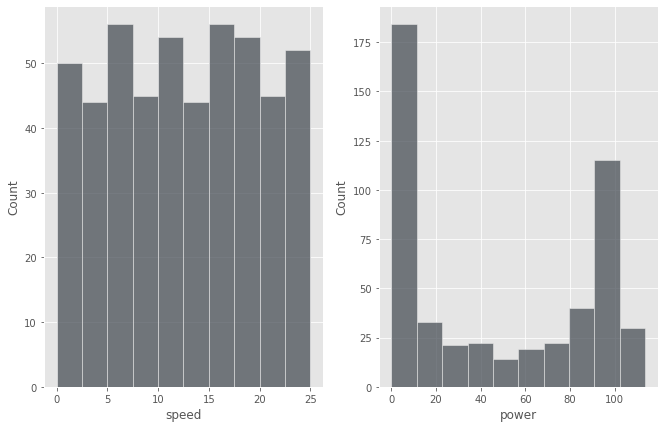

In [8]:
# check how the distribution looks like for speed and power column using hist plot.
fig, ax =plt.subplots(1,2)
sns.histplot(data=df, x="speed", ax=ax[0]);
sns.histplot(data=df, x="power", ax=ax[1]);

*Worth noting that there is a high volume of variables in a first section (0-10) of power output.*

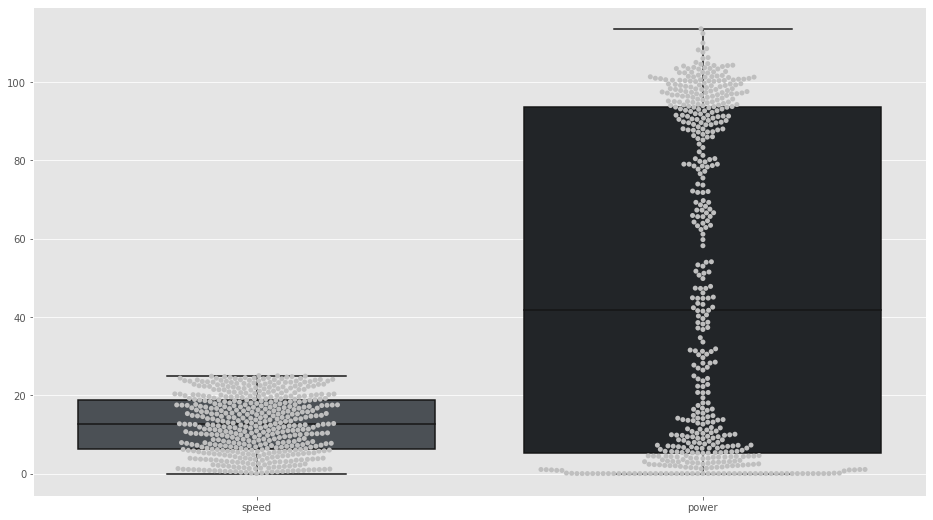

In [16]:
# Box plots are very useful to provide a visual summary of the data that enabling to identify outliers, 
# the dispersion of data set and shows if data is normally distributed or skewed.
sns.boxplot(data=df);
sns.swarmplot(data=df, color=".75");

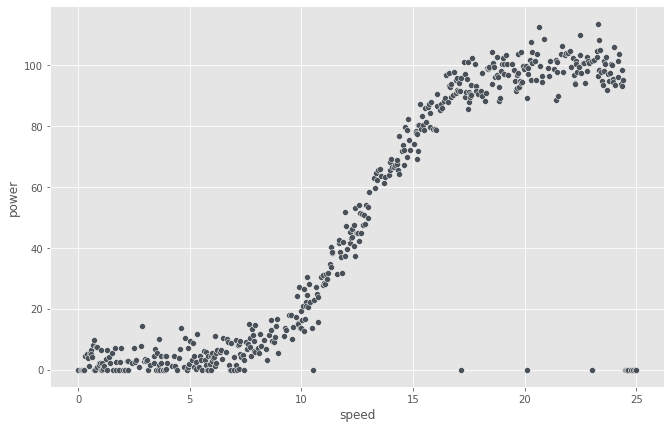

In [9]:
# Scatter plot clearly shows that we have some outliers.
sns.scatterplot(data=df, x='speed', y='power');

##### — Assumption

Taking into consideration the output from data preview and what can be observed at the scatter plot some assumption has to be made. Power turbine has to generate some power output above certain level apart from wind direction and air density which are not included in dataset so will not be taken into the consideration. Based on given dataset that includes wind speed and power output generated by power turbine, one seems to be a sweet spot. 


#### Preprocessing of dataset

In [10]:
# let's remove the outliers according to assumption made above 
# finding on how to remove rows based on a conditional expression
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
df = df.drop(df[(df.speed > 1) & (df.power == 0)].index).reset_index(drop=True)
df.T

,0,1,2,3,4,5,6,7,8,9,...,448,449,450,451,452,453,454,455,456,457
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,23.974,24.024,24.049,24.174,24.199,24.249,24.299,24.349,24.374,24.399
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,94.270,105.992,93.524,95.869,101.419,103.700,93.694,93.078,98.223,95.117


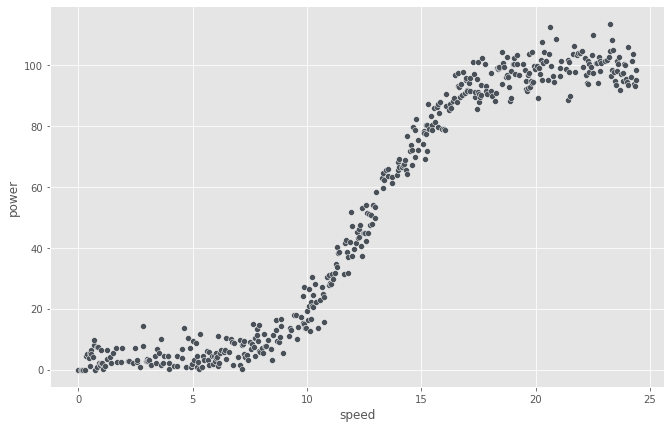

In [11]:
# plot of newly created dataset 
sns.scatterplot(data=df, x='speed', y='power');

#### — *Linear Regression*

Simple linear regression is a linear regression model that examines the linear relationship between two quantitative variables by fitting a linear equation that, as accurately as possible, predicts the dependent variable values based on function of the independent variable. 

![Linear Regression](https://miro.medium.com/max/688/0*Yfz5JM6W3a36FLD8.png)

A relationship between variables $Y$ and $X$ is represented by equation:

$$Y = \alpha + \beta X$$

where $Y$ is the dependent variable that will be estimate, $X$ is the independent variable that is used to make predictions, $\beta$ is the slope of the regression line and $\alpha$ is a constant also known $Y$ intercept (the value of $y$ when $x$ = 0).

In [12]:
# Converts column to numpy arrays and do regression using numpy polyfit.
x = df['speed'].to_numpy()
y = df['power'].to_numpy()

# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
m, c = np.polyfit(x, y, 1)
# Have a look at the m and c variables.
m, c

(5.547494007060822, -18.648297943832294)

In [13]:
# Calculate mean of x and y.
x_mean = np.mean(x)
y_mean = np.mean(y)

# Substract mean from x and y.

x_ = x - x_mean
y_ = y - y_mean

m = np.sum(x_ * y_) / np.sum(x_ * x_)

c = y_mean - m * x_mean

m, c

(5.547494007060821, -18.648297943832297)

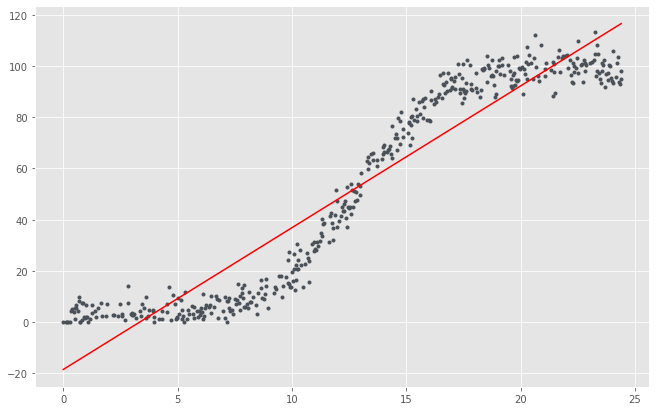

In [14]:
# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, m * x + c, 'r-');

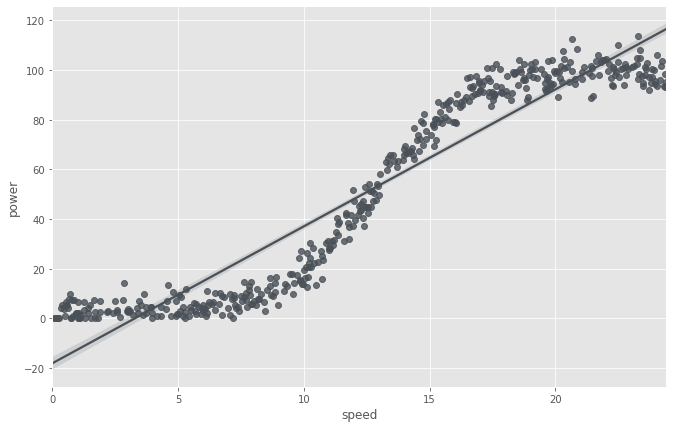

In [24]:
sns.regplot(data=df, x='speed', y='power');

### Train

In [39]:
x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x,y)
r = model.score(x,y)
p = [model.intercept_, model.coef_[0]]


In [40]:
r

0.8995192256106723

In [41]:
p

[-18.10254440267606, 5.515452262709561]

In [42]:
def f(v, p):
    return p[0] + v * p[1]

In [43]:
f(10, p)

37.05197822441954

### References

[1] — [Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

[2] — [Linear regression](https://en.wikipedia.org/wiki/Linear_regression)

[3] — [Yale: Linear regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=A%20linear%20regression%20line%20has,y%20when%20x%20%3D%200)

[4] — [Introduction to inference about slope in linear regression](https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/inference-slope/v/intro-inference-slope)



